In [42]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

In [2]:
convs=pd.read_csv('../data/bbAllFullConvosAWRandSortExtraDay.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (65,66,67,69,70,71,73,74,75,77,78,79,81,82,83,85,86,87,89,90,91,93,94,95,97,98,99,101,102,103,105,106,107,109,110,111,113,114,115,117,118,119,121,122,123,125,126,127,129,130,131,133,134,135,137,138,139,141,142,143,145,146,147,149,150,151,153,154,155,157,158,159,161,162,163,165,166,167,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ontopic=pd.read_csv('../data/SecondCodingCSV3.csv', sep=',', header=None)

In [4]:
ontopic.head()

,0,1
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1


In [5]:
convs['ontopicConvo']=ontopic[1]

In [6]:
len(convs[convs.ontopicConvo==1])

1895

In [7]:
len(convs[convs.ontopicConvo==0])

3461

In [8]:
codedNum=Out[6]+Out[7]

In [9]:
len(convs[convs.ontopicConvo==1])/float(codedNum)

0.3538088125466766

* So overall, **35%** of conversations are ontopic according to my coding

# Break down ontopic by Time

In [11]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [12]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [13]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [15]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [17]:
len(before)/float(len(convs))

0.15213739033040882

In [18]:
len(during)/float(len(convs))

0.3862236326302035

In [19]:
len(after)/float(len(convs))

0.27067388463692366

In [20]:
len(lafter)/float(len(convs))

0.17864476386036962

**So for the ALL conversations:**
* 15% happen Before
* 39% happen During
* 27% happen After
* and 18% happen Long After

In [21]:
len(before[before.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.0031662269129287598

In [22]:
len(during[during.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.7060686015831135

In [23]:
len(after[after.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.22480211081794196

In [24]:
len(lafter[lafter.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.05013192612137203

##### **Ontopic Conversations:**
* Are non-existant in Before (people didn't know yet)
* Are over-represented in During - 70% of ontopic conversations fall into During, whereas only 39% of all coded conversations happen in During
* Are slighlty under-represented in After and especially Long After (25% and 4% compared to 28% and 17% for all coded)

In [25]:
len(before[before.ontopicConvo==1])/float(len(before))

0.007361963190184049

In [26]:
len(during[during.ontopicConvo==1])/float(len(during))

0.6466892218463025

In [27]:
len(after[after.ontopicConvo==1])/float(len(after))

0.29379310344827586

In [28]:
len(lafter[lafter.ontopicConvo==1])/float(len(lafter))

0.09926854754440961

**Takeway:**
* Ontopic conversations comprise 65% of all the During conversations

## Conversation size, length, and tempo for ontopic vs offtopic conversations

In [30]:
np.median(convs.convSize[convs.ontopicConvo==1])

2.0

In [31]:
np.median(convs.convSize[convs.ontopicConvo==0])

2.0

In [32]:
np.percentile(convs.convSize[convs.ontopicConvo==1], 90)

4.0

**THIS CHANGED!!!!!**

In [33]:
np.percentile(convs.convSize[convs.ontopicConvo==0], 90)

4.0

In [34]:
np.median(convs.convoLen[convs.ontopicConvo==1])

858.0

In [35]:
np.median(convs.convoLen[convs.ontopicConvo==0])

670.0

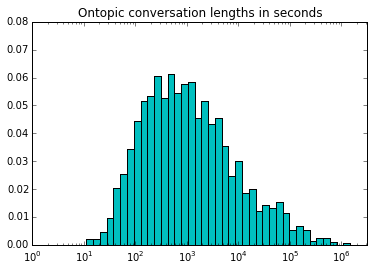

In [36]:
convoLen = convs.convoLen[convs.ontopicConvo==1].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Ontopic conversation lengths in seconds')

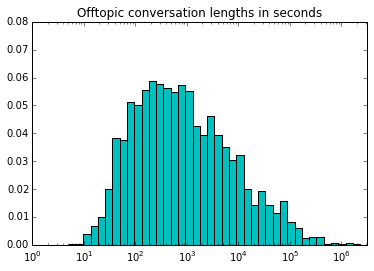

In [37]:
convoLen = convs.convoLen[convs.ontopicConvo==0].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Offtopic conversation lengths in seconds')

In [38]:
np.median(convs.medianReplyTime[convs.ontopicConvo==1])

498.5

In [39]:
np.median(convs.medianReplyTime[convs.ontopicConvo==0])

403.0

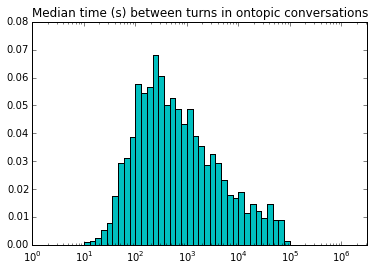

In [40]:
medRepTime=convs.medianReplyTime[convs.ontopicConvo==1].dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in ontopic conversations')

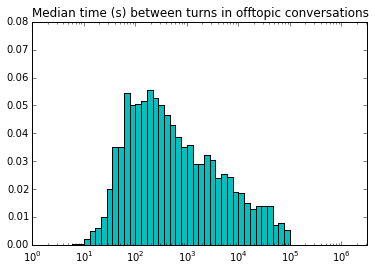

In [41]:
medRepTime=convs.medianReplyTime[convs.ontopicConvo==0].dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in offtopic conversations')

In [44]:
st.ranksums(convs.convoLen[convs.ontopicConvo==0], convs.convoLen[convs.ontopicConvo==1])

(-4.366042288431025, 1.2651799571066002e-05)

In [45]:
st.ranksums(convs.medianReplyTime[convs.ontopicConvo==0], convs.medianReplyTime[convs.ontopicConvo==1])

(-3.82309957260926, 0.00013178452966119795)

## Ontopic conversations and user configurations

In [46]:
ontopic=convs[convs.ontopicConvo==1]

In [47]:
offtopic=convs[convs.ontopicConvo==0]

#### Check distribution for user configurations for the ONTOPIC conversations

In [48]:
len(ontopic[ontopic.userSetLen==1])/float(len(ontopic))

0.1467018469656992

In [49]:
len(ontopic[ontopic.userSetLen==2])/float(len(ontopic))

0.8211081794195251

In [50]:
len(ontopic[ontopic.userSetLen>2])/float(len(ontopic))

0.03218997361477573

** Ontopic conversations:**
* Are under-represnted among the monologs (15% instead of 25% in overall/coded)
* Are over-represented among the dialogs (82% instead of 73% in overall/coded)
* And very slightly overrpresented among the group discussions(3% vs 2% in overall/coded)

In [51]:
len(offtopic[offtopic.userSetLen==1])/float(len(offtopic))

0.3074255995377059

In [52]:
len(offtopic[offtopic.userSetLen==2])/float(len(offtopic))

0.6844842531060387

In [53]:
len(offtopic[offtopic.userSetLen>2])/float(len(offtopic))

0.008090147356255418

** Off-topic conversations:**
* Are over-represnted among the monologs (31% instead of 25% in overall/coded)
* Are under-represented among the dialogs (68% instead of 73% in overall/coded)
* And very slightly under-rpresented among the group discussions (1% vs 2% in overall/coded)

In [54]:
len(ontopic[ontopic.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.20699925539836186

In [55]:
len(ontopic[ontopic.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.39643312101910827

In [56]:
len(ontopic[ontopic.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.6853932584269663

In [57]:
len(offtopic[offtopic.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.7922561429635145

In [58]:
len(offtopic[offtopic.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.6035668789808917

In [59]:
len(offtopic[offtopic.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.3146067415730337

** On-topic conversations:**
* Make up 21% of monologs
* Make up 40% of dialogs
* And makeup 69% of group chats

** Off-topic conversations:**
* Make up 79% of monologs
* Make up 60% of dialogs
* And makeup 32% of group chats


* So monologs tend to be off-topic (self-correction in most cases)
* Dialogs are still more often off-topic (60%) than on (40%), but dialogs are much more often on-topic than monologs
* And most group conversations are on-topic

## Ontopic/offtopic conversations and high-follower users

In [60]:
len(ontopic[ontopic.allHighFollowUsers==0])/float(len(convs[convs.allHighFollowUsers==0]))

0.25920542635658916

In [61]:
len(ontopic[ontopic.allHighFollowUsers>0])/float(len(convs[convs.allHighFollowUsers>0]))

0.4129972669298512

In [62]:
len(offtopic[offtopic.allHighFollowUsers==0])/float(len(convs[convs.allHighFollowUsers==0]))

0.7403100775193798

In [63]:
len(offtopic[offtopic.allHighFollowUsers>0])/float(len(convs[convs.allHighFollowUsers>0]))

0.5870027330701488

** Conversations with NO Popular Users:**
* Are 26% on-topic
* And 74% off-topic

** Conversations with Popular Users:**
* Are 41% on-topic
* And 59% off-topic


* So conversations with Popular Users are more likely to be on-topic
* These are often news and government accounts that provide official information
* So conversations with them are more likely to be ontopic
* JUST represent ontopic % in the TEXT

### Ontopic and high-followers over time

In [64]:
len(before[(before.ontopicConvo==1) & (before.allHighFollowUsers>0)])/float(len(before.allHighFollowUsers>0))

0.0036809815950920245

In [65]:
len(during[(during.ontopicConvo==1) & (during.allHighFollowUsers>0)])/float(len(during.allHighFollowUsers>0))

0.46205896568390525

In [66]:
len(after[(after.ontopicConvo==1) & (after.allHighFollowUsers>0)])/float(len(after.allHighFollowUsers>0))

0.21379310344827587

In [67]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.allHighFollowUsers>0)])/float(len(lafter.allHighFollowUsers>0))

0.0741901776384535

**Over Time Periods:**
* Conversations with Popular Users are most often on-topic in the During period (46% of During conversations with Popular Users)
* Less frequently after (21% of After conversations with Popular Users)
* And only 7% for Long After conversations with Popular Users
* Again, this points to the fact the Popular users with whom the geo-vulnerable engage during are carriers of relevant information
* Represent as BAR CHART - this and below?

In [68]:
len(before[(before.ontopicConvo==1) & (before.allHighFollowUsers==0)])/float(len(before.allHighFollowUsers==0))

0.0036809815950920245

In [69]:
len(during[(during.ontopicConvo==1) & (during.allHighFollowUsers==0)])/float(len(during.allHighFollowUsers==0))

0.18463025616239728

In [70]:
len(after[(after.ontopicConvo==1) & (after.allHighFollowUsers==0)])/float(len(after.allHighFollowUsers==0))

0.08

In [71]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.allHighFollowUsers==0)])/float(len(lafter.allHighFollowUsers==0))

0.025078369905956112

* Conversations with NO Popular users are also most often on-topic During, but with only 18% of these conversations being on-topic in that time period

## Ontopic/offtopic conversations and strong-ties users

In [72]:
len(ontopic[ontopic.strongTiesAllUsers<2])/float(len(convs[convs.strongTiesAllUsers<2]))

0.3735763097949886

In [73]:
len(ontopic[ontopic.strongTiesAllUsers>1])/float(len(convs[convs.strongTiesAllUsers>1]))

0.32705779334500873

In [74]:
len(offtopic[offtopic.strongTiesAllUsers<2])/float(len(convs[convs.strongTiesAllUsers<2]))

0.6260982753010088

In [75]:
len(offtopic[offtopic.strongTiesAllUsers>1])/float(len(convs[convs.strongTiesAllUsers>1]))

0.6729422066549913

**Conversations with less-than-two "thick reply tie" users:**
* Are 37% on-topic
* 63% on-topic

**Conversation with two-or-more "thick reply tie" users:**
* Are 33% on-topic
* 67% off-topic


* Not a strong difference (CHECK if stat sig)
* But it seems that conversation with less-than-two thick reply tie users are a bit more often on topic

### Check with some vs none (as opposed to 0-1 vs >1)

In [78]:
len(ontopic[ontopic.strongTiesAllUsers==0])/float(len(convs[convs.strongTiesAllUsers==0]))

0.4151931892599869

In [79]:
len(ontopic[ontopic.strongTiesAllUsers>0])/float(len(convs[convs.strongTiesAllUsers>0]))

0.329242819843342

**This makes the difference STRONGER:**
* 42% of conversations with no thick-reply-tie users are on-topic
* And 33% of conversations with thick-reply-tie users are on-topic

In [76]:
len(ontopic[ontopic.strongTiesAllUsers<2])/float(len(ontopic))

0.6058047493403694

In [77]:
len(ontopic[ontopic.strongTiesAllUsers>1])/float(len(ontopic))

0.3941952506596306

### Excluding high follower-count users

In [80]:
len(ontopic[(ontopic.strongTiesAllUsers<2) & (ontopic.allHighFollowUsers==0)])/float(len(convs[(convs.strongTiesAllUsers<2) & (convs.allHighFollowUsers==0)]))

0.2616407982261641

In [81]:
len(ontopic[(ontopic.strongTiesAllUsers>1)&(ontopic.allHighFollowUsers==0)])/float(len(convs[(convs.strongTiesAllUsers>1)&(convs.allHighFollowUsers==0)]))

0.2545710267229255

### Ontopic and strong-tie over time

#### Many thick reply tie users

In [82]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers>1)])/float(len(before.strongTiesAllUsers>1))

0.0036809815950920245

In [83]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers>1)])/float(len(during.strongTiesAllUsers>1))

0.24311261478975352

In [84]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers>1)])/float(len(after.strongTiesAllUsers>1))

0.12758620689655173

In [85]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers>1)])/float(len(lafter.strongTiesAllUsers>1))

0.04806687565308255

#### Few thick reply tie users

In [86]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers<2)])/float(len(before.strongTiesAllUsers<2))

0.0036809815950920245

In [87]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers<2)])/float(len(during.strongTiesAllUsers<2))

0.4035766070565491

In [88]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers<2)])/float(len(after.strongTiesAllUsers<2))

0.16620689655172413

In [89]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers<2)])/float(len(lafter.strongTiesAllUsers<2))

0.051201671891327065

### Check with some vs none (as opposed to 0-1 vs >1)

#### Any thick reply tie users

In [90]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers>0)])/float(len(before.strongTiesAllUsers>0))

0.006134969325153374

In [91]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers>0)])/float(len(during.strongTiesAllUsers>0))

0.40985983566940554

In [92]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers>0)])/float(len(after.strongTiesAllUsers>0))

0.21724137931034482

In [93]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers>0)])/float(len(lafter.strongTiesAllUsers>0))

0.07523510971786834

#### No thick reply tie users

In [94]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers==0)])/float(len(before.strongTiesAllUsers==0))

0.001226993865030675

In [95]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers==0)])/float(len(during.strongTiesAllUsers==0))

0.23682938617689706

In [96]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers==0)])/float(len(after.strongTiesAllUsers==0))

0.07655172413793103

In [97]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers==0)])/float(len(lafter.strongTiesAllUsers==0))

0.024033437826541274

**I'm SO confused!!!:**
* I think it's the conversations with one thick-reply-tie user that decide everything
* And depending on how you fold them in you get different results
* I think we need to investigate THREE CATEGORY here

### With THREE Category

In [98]:
len(ontopic[ontopic.strongTiesAllUsers==0])/float(len(convs[convs.strongTiesAllUsers==0]))

0.4151931892599869

In [99]:
len(ontopic[ontopic.strongTiesAllUsers==1])/float(len(convs[convs.strongTiesAllUsers==1]))

0.33247089262613194

In [100]:
len(ontopic[ontopic.strongTiesAllUsers>1])/float(len(convs[convs.strongTiesAllUsers>1]))

0.32705779334500873

In [101]:
len(ontopic[ontopic.strongTiesAllUsers==0])/float(len(ontopic))

0.3345646437994723

In [102]:
len(ontopic[ontopic.strongTiesAllUsers==1])/float(len(ontopic))

0.2712401055408971

In [103]:
len(ontopic[ontopic.strongTiesAllUsers>1])/float(len(ontopic))

0.3941952506596306

#### No thick reply tie users

In [104]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers==0)])/float(len(before.strongTiesAllUsers==0))

0.001226993865030675

In [105]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers==0)])/float(len(during.strongTiesAllUsers==0))

0.23682938617689706

In [106]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers==0)])/float(len(after.strongTiesAllUsers==0))

0.07655172413793103

In [107]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers==0)])/float(len(lafter.strongTiesAllUsers==0))

0.024033437826541274

#### One thick reply tie users

In [108]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers==1)])/float(len(before.strongTiesAllUsers==1))

0.00245398773006135

In [109]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers==1)])/float(len(during.strongTiesAllUsers==1))

0.16674722087965202

In [110]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers==1)])/float(len(after.strongTiesAllUsers==1))

0.0896551724137931

In [111]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers==1)])/float(len(lafter.strongTiesAllUsers==1))

0.027168234064785787

#### Many thick reply tie users

In [112]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers>1)])/float(len(before.strongTiesAllUsers>1))

0.0036809815950920245

In [113]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers>1)])/float(len(during.strongTiesAllUsers>1))

0.24311261478975352

In [114]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers>1)])/float(len(after.strongTiesAllUsers>1))

0.12758620689655173

In [115]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers>1)])/float(len(lafter.strongTiesAllUsers>1))

0.04806687565308255

## Check if new pairs come up during

In [116]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

In [117]:
convs.allNames=convs.allNames.apply(lambda x: str(sorted(x)))

In [118]:
len(before.allNames)

815

In [119]:
len(set(before.allNames))

598

* So coded Before has 815 conversations with 589 unique sets of user

In [120]:
len(during.allNames)

2069

In [121]:
len(set(during.allNames))

1493

* So coded Before has 2069 conversations with 1493 unique sets of user

In [139]:
len(after.allNames)

1450

In [140]:
len(set(after.allNames))

982

In [142]:
len(set(before.allNames)& set(during.allNames))/float(len(set(before.allNames)))

0.34448160535117056

In [144]:
len(set(before.allNames)& set(after.allNames))/float(len(set(before.allNames)))

0.24247491638795987

In [145]:
len(set(before.allNames)& set(lafter.allNames))/float(len(set(before.allNames)))

0.20903010033444816

In [146]:
len(set(during.allNames) & set(after.allNames))/float(len(set(during.allNames)))

0.1955793703951775

In [147]:
len(set(during.allNames) & set(lafter.allNames))/float(len(set(during.allNames)))

0.1406563965170797

In [148]:
len(set(after.allNames) & set(lafter.allNames))/float(len(set(after.allNames)))

0.21384928716904278

In [129]:
newFronBtoD=set(during.allNames)-set(before.allNames)

In [130]:
newDFforBtoD=during[during.allNames.isin(newFronBtoD)]

In [131]:
tieStrength=newDFforBtoD.strongTiesAllUsers.groupby(newDFforBtoD.allNames).first()

In [132]:
len(tieStrength[tieStrength<2])/float(len(tieStrength))

0.7544677544677545

So **75%** of new pairings that emerge from Before to During are with **less than two frequent conversationalists**

In [153]:
newDFforBtoD.head().values

array([[264445560503820288, '2012-11-02 19:15:09', 'PatricksBeer', ...,
        '(264445560503820288, 264455988684410881, 264466623149268992)',
        4.0, 1.0],
       [263029604414001152, '2012-10-29 21:28:39', 'NYCMayorsOffice', ...,
        '(263029604414001152, 263036687502954497)', 7.0, 1.0],
       [264518210819354624, '2012-11-03 00:03:50', 'MUPepBand', ...,
        '(264518210819354624, 264539761077800960, 264539996235628545, 264540206928121856, 264540640489127936, 264541224206233601, 264541560195145729, 264541665337933824)',
        11.0, 1.0],
       [264527625156960256, '2012-11-03 00:41:15', 'colleenk7', ...,
        '(264527625156960256, 264529510005895170)', 13.0, 0.0],
       [262598189314633729, '2012-10-28 16:54:21', 'CaptKrunch', ...,
        '(262598189314633729, 262734884563456000)', 16.0, 0.0]], dtype=object)

## Look at conversations with Many frequent conversationalists

In [156]:
manyStrongTie=convs[convs.strongTiesAllUsers>1]

In [158]:
len(manyStrongTie)

2284

In [159]:
sample=manyStrongTie.head(228)

In [163]:
sample.loc[:,'newInd']=xrange(228)

/home/mako0970/.local/lib/python2.7/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [207]:
sample[sample.newInd==41].values

array([[259054654585970688, '2012-10-18 22:13:37', 'kessler',
        'What should I eat for dinner tonight? #sushi #indian #mexican #sandwich #soup #salad',
        259343679389589504, '2012-10-19 17:22:06', 'kfalter',
        '@kessler indian!', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
        '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
        '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
        '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0'

In [208]:
fewStrongTie=convs[convs.strongTiesAllUsers<=1]

In [209]:
len(fewStrongTie)

3073

In [210]:
sample=fewStrongTie.head(307)

In [211]:
sample.loc[:,'newInd']=xrange(307)

/home/mako0970/.local/lib/python2.7/site-packages/pandas/core/indexing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [249]:
sample[sample.newInd==37].values

array([[258968704287637504, '2012-10-18 16:32:05', 'kkoopers',
        '@blockedbyleann  hear that @leannrimes @marcelpariseau? Seriously Marcel, UR the worst PR rep.',
        258968922290806784, '2012-10-18 16:32:57', 'kkoopers',
        "@kkoopers @blockedbyleann @leannrimes @MarcelPariseau Isn't ur job to advise ur client so they look good to the public, not to be a yes man?",
        0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
        '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
        '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '

## Links New to During

In [250]:
len(newDFforBtoD)

1642

In [251]:
sample=newDFforBtoD.head(164)

In [252]:
sample.loc[:,'newInd']=xrange(164)

In [276]:
sample[sample.newInd==148].values

array([[262628166022094848, '2012-10-28 18:53:28', 'healthyhappier',
        "@mrsmillersmiles @marathonwiner um I did like 16-20 I think. Not home so can't check exact",
        262630632750993408, '2012-10-28 19:03:16', 'marathonwiner',
        '@healthyhappier @mrsmillersmiles @runningbun @EpicuriousRunnr thanks ladies!!!',
        0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
        '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
        '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
  